In [32]:
%matplotlib inline
import os

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [40]:
matplotlib.rc('grid', linestyle='-', alpha=.3)

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250_min_1e-20_max_1.9e-19_ng_4_dlogN_.4262_.4261_.4262__P_1_T_250_min_1.1e-20_max_2.3e-17_ng_3_dlogN_1.42_1.90',
                          'wgt_1_1_1_1_.7_.7_.7',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250_min_1e-20_max_1.9e-19_ng_4_dlogN_.4262_.4261_.4262__P_1_T_250_min_1.1e-20_max_2.3e-17_ng_3_dlogN_1.42_1.90',
                          'wgt_1_1_1_1_.7_.7_.7',
                          'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [14]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 7 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [15]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [16]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [17]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [18]:
fig.display_hrefanchor()

In [19]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [20]:
table_dgdgs.display_hrefanchor()

In [21]:
for g in range(1, 7 + 1):
    s = 'Table: cooling rate. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

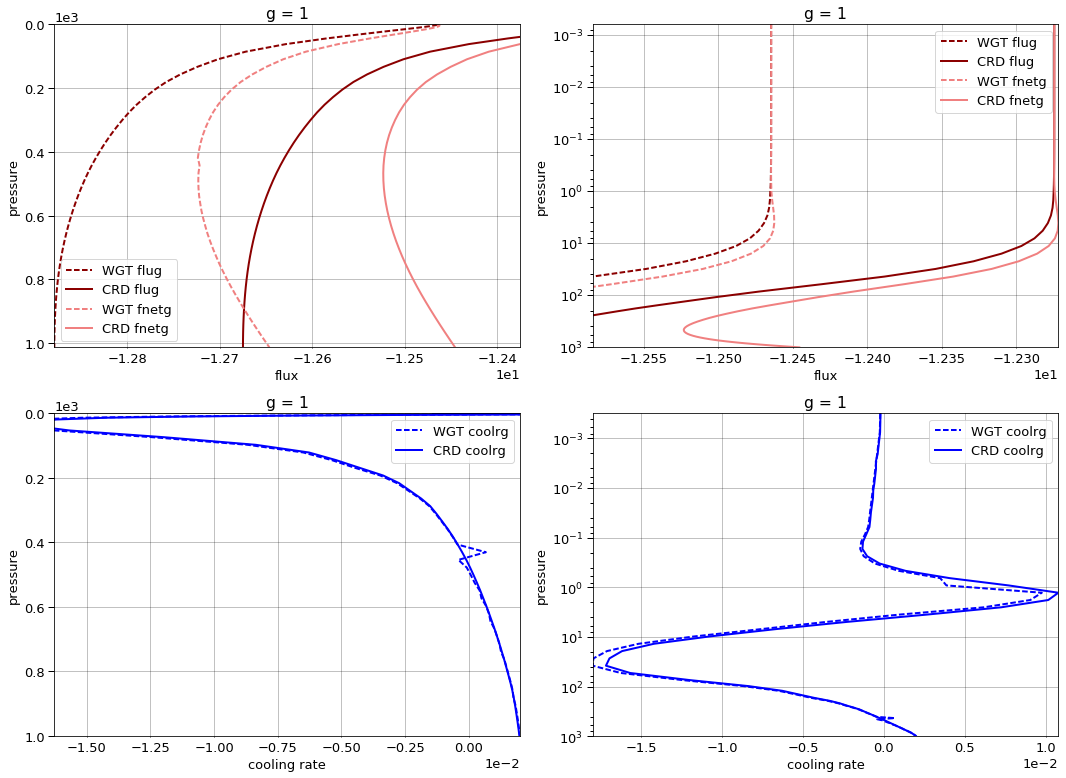

# Figure: flux, cooling rate. g-group 2

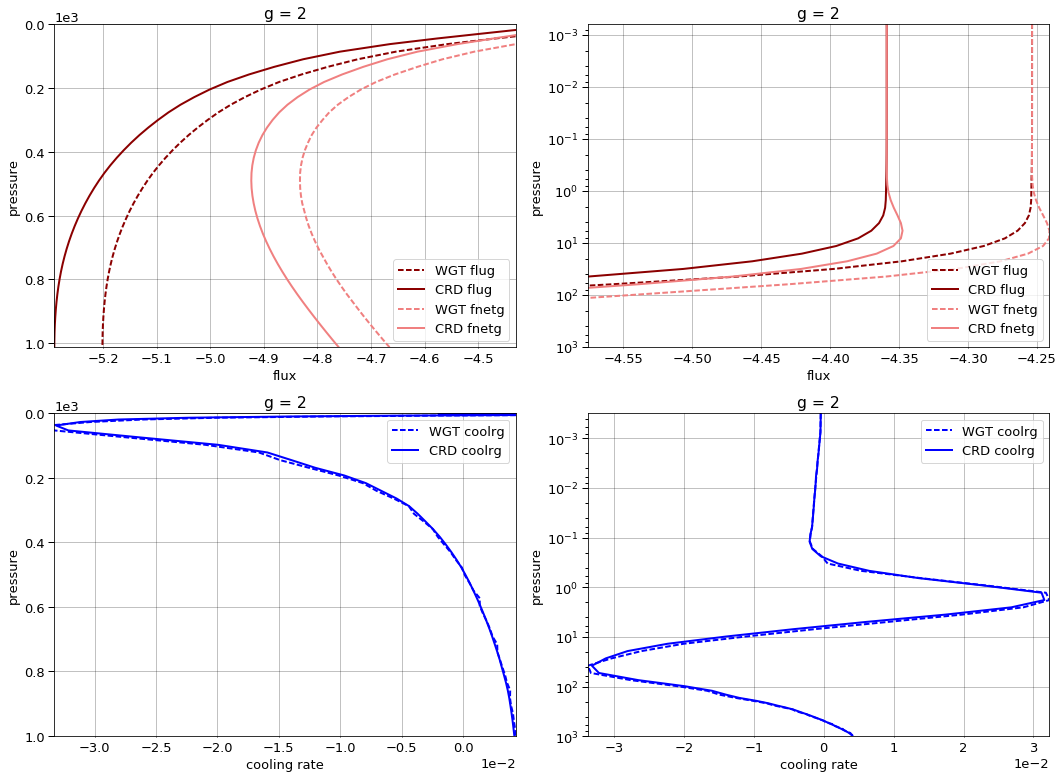

# Figure: flux, cooling rate. g-group 3

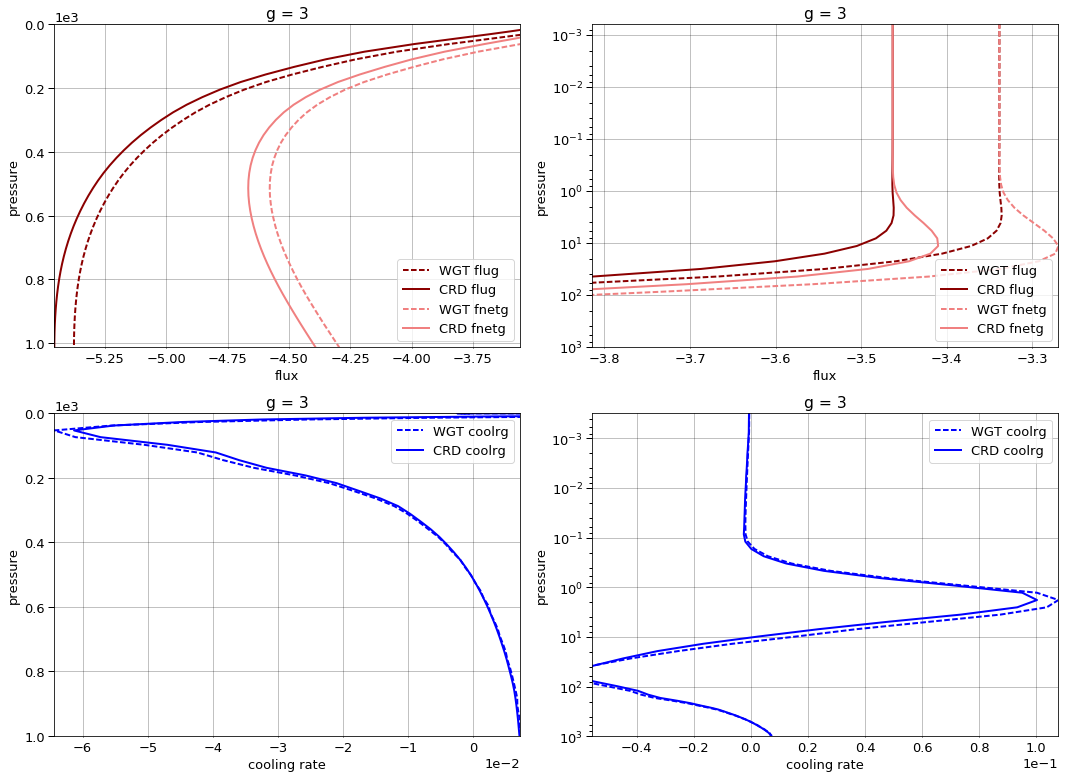

# Figure: flux, cooling rate. g-group 4

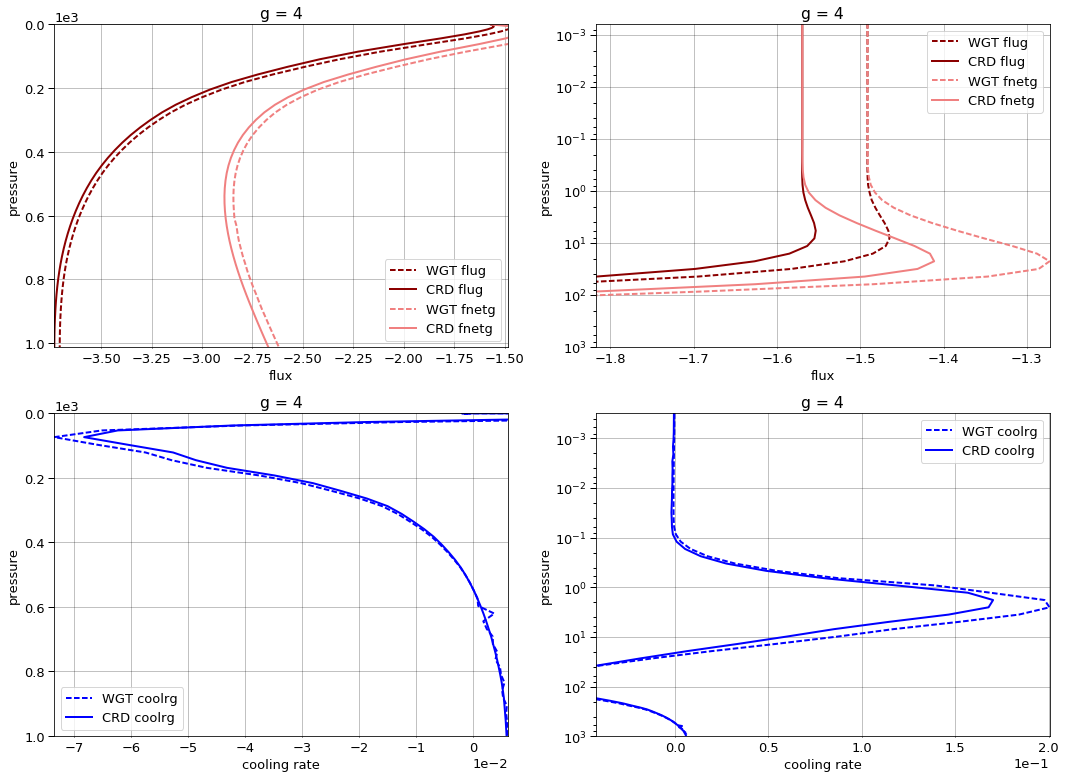

# Figure: flux, cooling rate. g-group 5

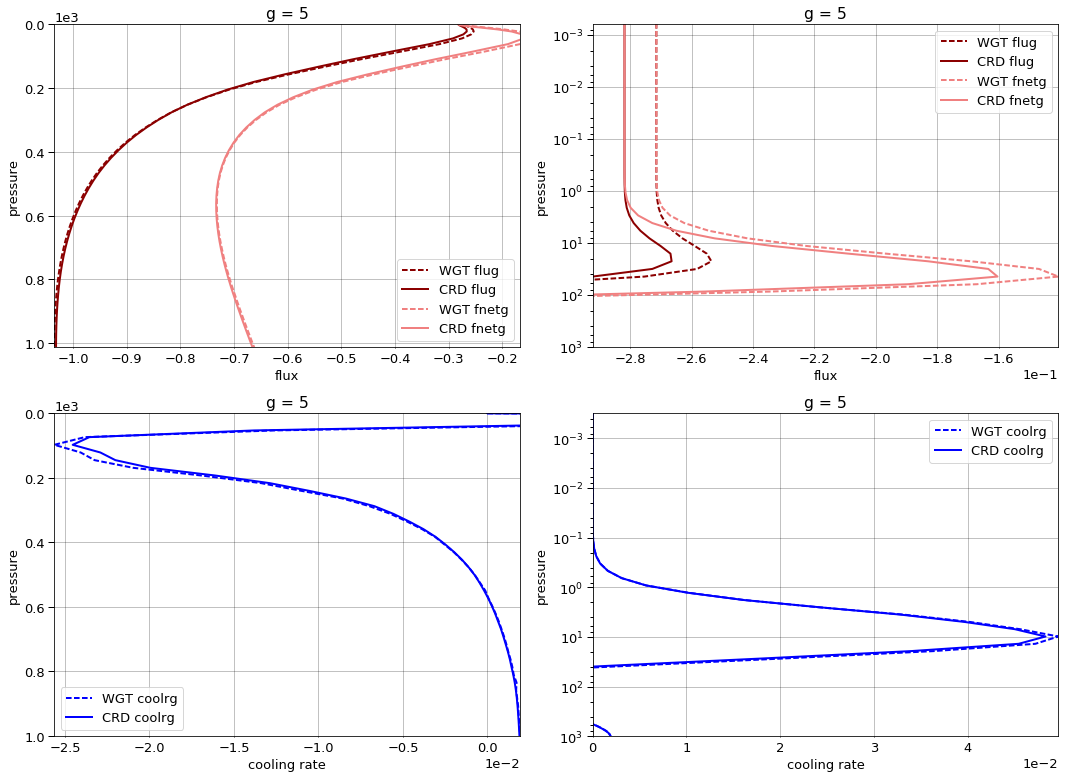

# Figure: flux, cooling rate. g-group 6

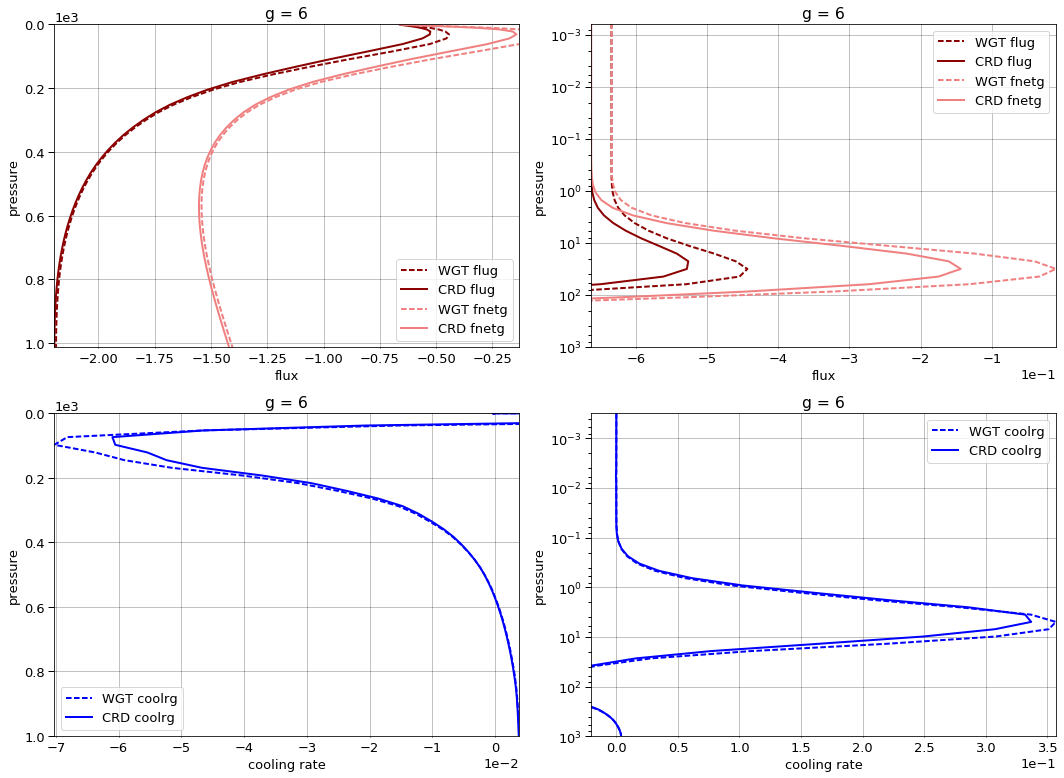

# Figure: flux, cooling rate. g-group 7

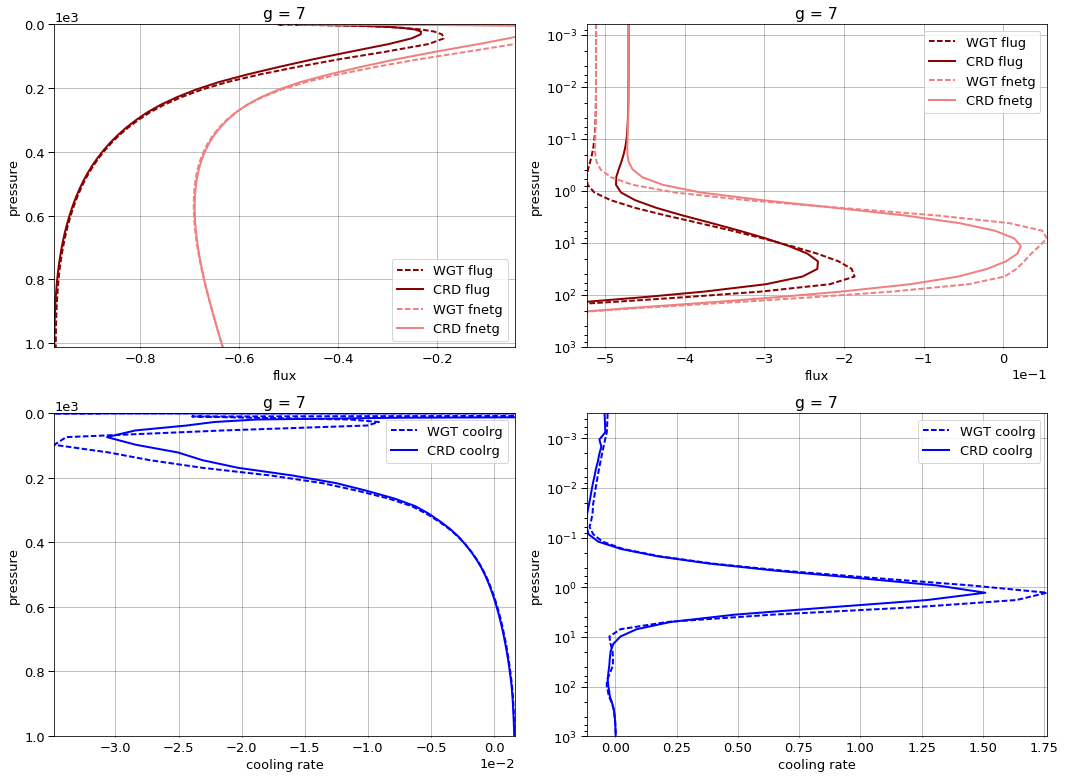

# Figure: flux, cooling rate. g-group total

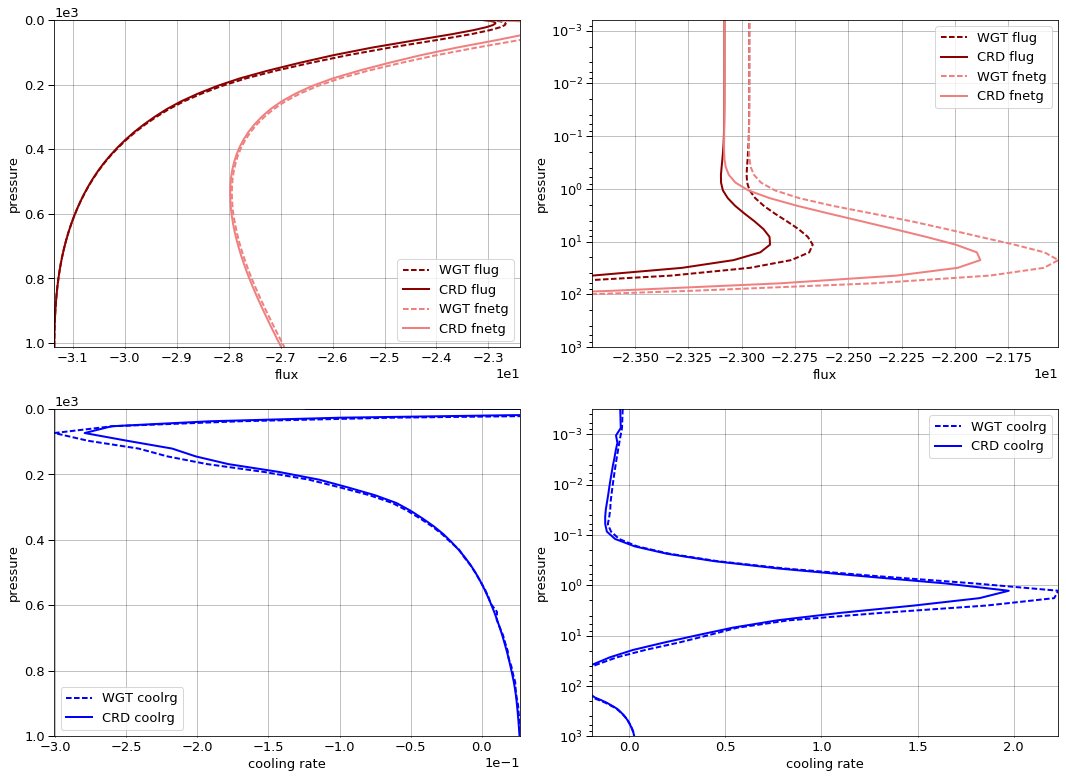

In [41]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [23]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -12.274527  0.000000 -12.274527
  1013.0   76    -12.674908  0.229195 -12.445712
2 0.0      1      -4.358967  0.000000  -4.358967
  1013.0   76     -5.290591  0.530449  -4.760142
3 0.0      1      -3.463169  0.000000  -3.463169
  1013.0   76     -5.455917  1.064528  -4.391390
4 0.0      1      -1.569582  0.000000  -1.569582
  1013.0   76     -3.731833  1.061202  -2.670631
5 0.0      1      -0.281813  0.000000  -0.281813
  1013.0   76     -1.031492  0.365911  -0.665581
6 0.0      1      -0.662652  0.000000  -0.662652
  1013.0   76     -2.195904  0.776243  -1.419661
7 0.0      1      -0.470755  0.000000  -0.470755
  1013.0   76     -0.973590  0.340138  -0.633451


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -12.464636  0.000000 -12.464636
  1013.0   76    -12.878752  0.232341 -12.646411
2 0.0      1      -4.253554  0.000000  -4.253554
  1013.0   76     -5.200884  0.535406  -4.665478
3 0.0      1      -3.338410  0.000000  -3.338410
  1013.0   76     -5.375945  1.080889  -4.295056
4 0.0      1      -1.491343  0.000000  -1.491343
  1013.0   76     -3.705025  1.086557  -2.618468
5 0.0      1      -0.271444  0.000000  -0.271444
  1013.0   76     -1.034690  0.372269  -0.662420
6 0.0      1      -0.634053  0.000000  -0.634053
  1013.0   76     -2.188264  0.783488  -1.404776
7 0.0      1      -0.511558  0.000000  -0.511558
  1013.0   76     -0.970675  0.337610  -0.633065


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.190109  0.000000 -0.190109
  1013.0   76    -0.203844  0.003146 -0.200699
2 0.0      1      0.105412  0.000000  0.105412
  1013.0   76     0.089707  0.004957  0.094664
3 0.0      1      0.124759  0.000000  0.124759
  1013.0   76     0.079973  0.016361  0.096334
4 0.0      1      0.078240  0.000000  0.078240
  1013.0   76     0.026808  0.025355  0.052163
5 0.0      1      0.010369  0.000000  0.010369
  1013.0   76    -0.003198  0.006358  0.003161
6 0.0      1      0.028599  0.000000  0.028599
  1013.0   76     0.007640  0.007246  0.014885
7 0.0      1     -0.040803  0.000000 -0.040803
  1013.0   76     0.002915 -0.002528  0.000387

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -2.130723e-04
  1001.112500 75     1.983128e-03
2 0.000312    1     -4.104219e-04
  1001.112500 75     4.172922e-03
3 0.000312    1     -6.411990e-04
  1001.112500 75     7.118713e-03
4 0.000312    1     -6.386036e-04
  1001.112500 75     5.884643e-03
5 0.000312    1     -1.235699e-07
  1001.112500 75     1.899883e-03
6 0.000312    1     -9.477223e-05
  1001.112500 75     3.781038e-03
7 0.000312    1     -4.362559e-02
  1001.112500 75     1.608040e-03


WGT


coolrg
g pressure    layer              
1 0.000312    1     -2.280792e-04
  1001.112500 75     2.007878e-03
2 0.000312    1     -4.187778e-04
  1001.112500 75     4.300599e-03
3 0.000312    1     -5.533245e-04
  1001.112500 75     7.256217e-03
4 0.000312    1     -3.868119e-04
  1001.112500 75     6.079237e-03
5 0.000312    1     -3.653555e-08
  1001.112500 75     1.934811e-03
6 0.000312    1     -4.271426e-05
  1001.112500 75     3.839283e-03
7 0.000312    1     -3.108481e-02
  1001.112500 75     1.638341e-03


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.500690e-05
  1001.112500 75     2.475000e-05
2 0.000312    1     -8.355900e-06
  1001.112500 75     1.276771e-04
3 0.000312    1      8.787450e-05
  1001.112500 75     1.375037e-04
4 0.000312    1      2.517916e-04
  1001.112500 75     1.945938e-04
5 0.000312    1      8.703433e-08
  1001.112500 75     3.492790e-05
6 0.000312    1      5.205797e-05
  1001.112500 75     5.824540e-05
7 0.000312    1      1.254078e-02
  1001.112500 75     3.030080e-05

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-23.081465,0.000000,-23.081465
1013.0,76,-31.354235,4.367667,-26.986568



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-22.964999,0.000000,-22.964999
1013.0,76,-31.354235,4.428561,-26.925674



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,1.164660e-01,0.000000,0.116466
1013.0,76,3.600000e-07,0.060895,0.060894


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.045624
1001.112500,75,0.026448



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.032715
1001.112500,75,0.027056



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.012909
1001.112500,75,0.000608


In [24]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.410750,0.402196
2,0.165875,0.169859
3,0.171458,0.174865
4,0.118167,0.119209
5,0.033000,0.032802
6,0.069792,0.070027
7,0.030958,0.031042


In [ ]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')